In [ ]:
import pandas as pd

# Load one of the uploaded files to examine its structure and content

hunger_index_df = pd.read_csv("global-hunger-index.csv")

# Display the first few rows of the dataframe
hunger_index_df.head()

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations
0,Afghanistan,AFG,2000,50.9,NaN
1,Afghanistan,AFG,2006,42.7,NaN
2,Afghanistan,AFG,2012,34.3,NaN
3,Afghanistan,AFG,2021,28.3,NaN
4,Albania,ALB,2000,20.7,NaN


In [ ]:
# Step 1: Standardizing Column Names
hunger_index_df.columns = ['country', 'code', 'year', 'global_hunger_index', 'annotations']

# Step 2: Handling Missing Values
# For now, we'll just check for missing values to decide on a strategy
missing_values_summary = hunger_index_df.isnull().sum()

# Step 3: Verifying Data Types
data_types_summary = hunger_index_df.dtypes

missing_values_summary, data_types_summary


(country                  0
 code                     0
 year                     0
 global_hunger_index      0
 annotations            459
 dtype: int64,
 country                 object
 code                    object
 year                     int64
 global_hunger_index    float64
 annotations             object
 dtype: object)

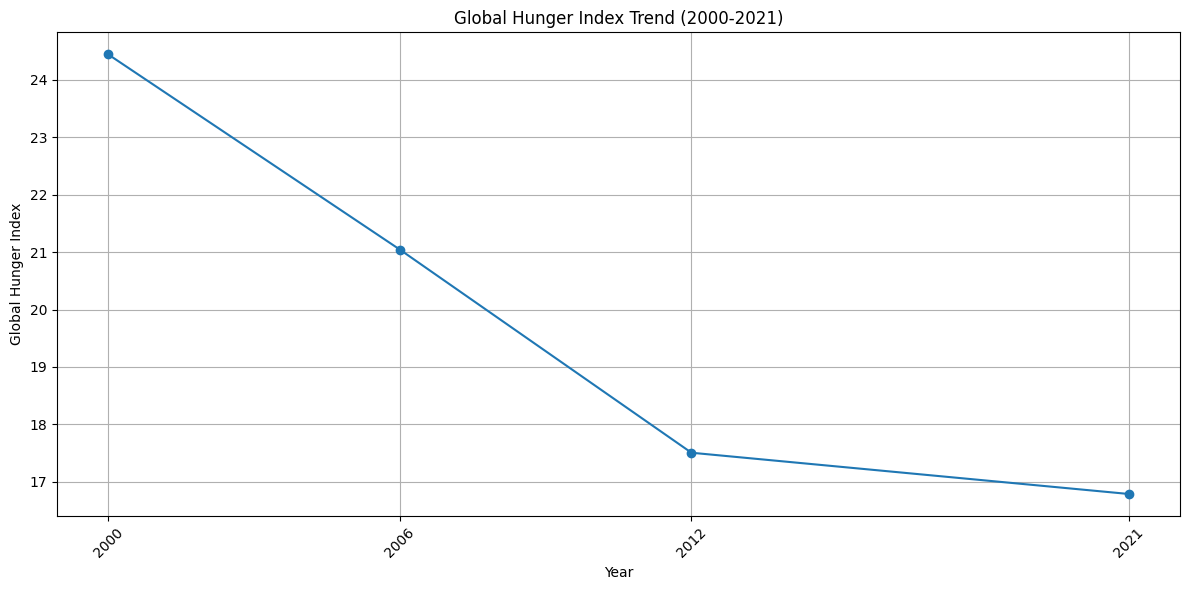

In [ ]:
import matplotlib.pyplot as plt

# Trend Analysis: Global Average of Hunger Index over Time
global_average_hunger_index = hunger_index_df.groupby('year')['global_hunger_index'].mean().reset_index()

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(global_average_hunger_index['year'], global_average_hunger_index['global_hunger_index'], marker='o', linestyle='-')
plt.title('Global Hunger Index Trend (2000-2021)')
plt.xlabel('Year')
plt.ylabel('Global Hunger Index')
plt.grid(True)
plt.xticks(global_average_hunger_index['year'], rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()

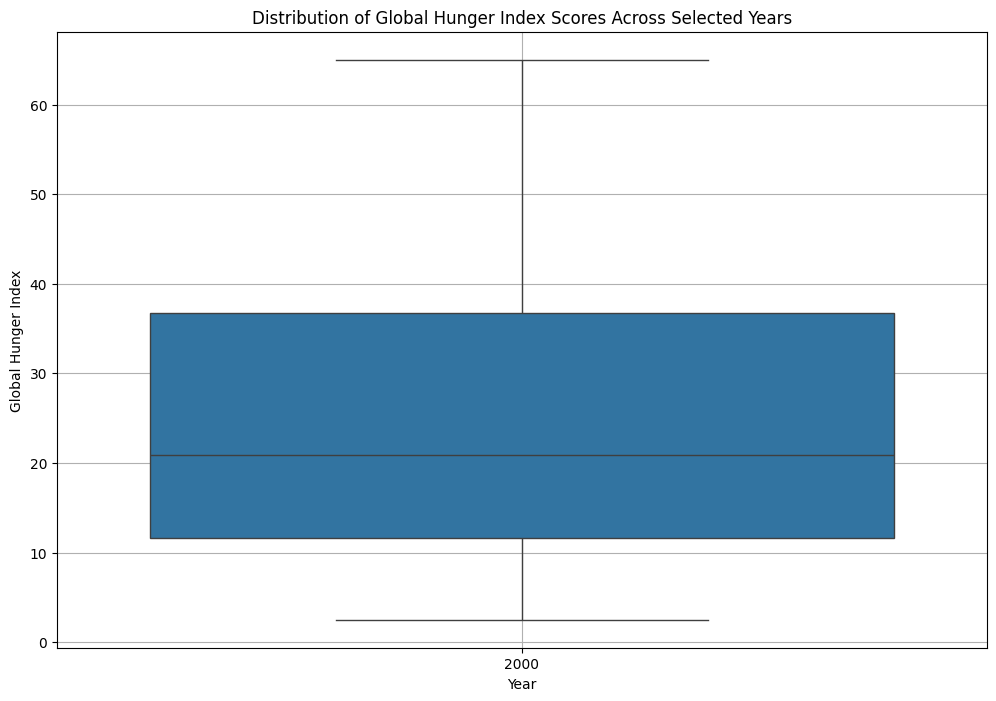

(                      country code  year  global_hunger_index  \
 395                   Somalia  SOM  2021                 50.8   
 468                     Yemen  YEM  2021                 45.1   
 80   Central African Republic  CAF  2021                 43.0   
 64                    Burundi  BDI  2021                 42.5   
 97                    Comoros  COM  2021                 42.5   
 
                                            annotations  
 395                                                NaN  
 468                                                NaN  
 80                                                 NaN  
 64   Value represents the mid-point of its group in...  
 97   Value represents the mid-point of its group in...  ,
                    country code  year  global_hunger_index annotations
 35                 Belarus  BLR  2021                  2.5         NaN
 47  Bosnia and Herzegovina  BIH  2021                  2.5         NaN
 55                  Brazil  BRA  202

In [ ]:
import seaborn as sns

# Selecting a few years for distribution analysis
selected_years = hunger_index_df['year'].unique()[::5]  # Sample every 5th year for a broad time range

# Creating a subset of the dataframe for selected years
subset_df = hunger_index_df[hunger_index_df['year'].isin(selected_years)]

# Plotting the distribution of Global Hunger Index scores for selected years
plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='global_hunger_index', data=subset_df)
plt.title('Distribution of Global Hunger Index Scores Across Selected Years')
plt.xlabel('Year')
plt.ylabel('Global Hunger Index')
plt.grid(True)
plt.show()

# Proceed to comparative analysis
latest_year = hunger_index_df['year'].max()
top_countries = hunger_index_df[hunger_index_df['year'] == latest_year].nlargest(5, 'global_hunger_index')
bottom_countries = hunger_index_df[hunger_index_df['year'] == latest_year].nsmallest(5, 'global_hunger_index')

top_countries, bottom_countries


Distribution Analysis
The boxplot illustrates the distribution of Global Hunger Index scores across selected years. It shows the spread and central tendencies of the scores, highlighting variations and trends over time. The variability in the distribution suggests differences in hunger levels across countries, with some years showing wider spreads indicating greater disparities.

Comparative Analysis
For the most recent year available in the dataset (2021), the countries with the highest Global Hunger Index scores (indicating higher levels of hunger) are:

Somalia: 50.8
Yemen: 45.1
Central African Republic: 43.0
Burundi: 42.5
Comoros: 42.5
Conversely, countries with the lowest Global Hunger Index scores (indicating lower levels of hunger) are:

Belarus: 2.5
Bosnia and Herzegovina: 2.5
Brazil: 2.5
Chile: 2.5
China: 2.5
These findings highlight significant disparities in global food security, with some regions facing critical hunger challenges, while others have managed to reduce hunger to very low levels. This comparative insight is crucial for targeting interventions and support to the regions most in need.

<ipython-input-8-22e20604bfeb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='global_hunger_index', data=comparative_df, palette='viridis')


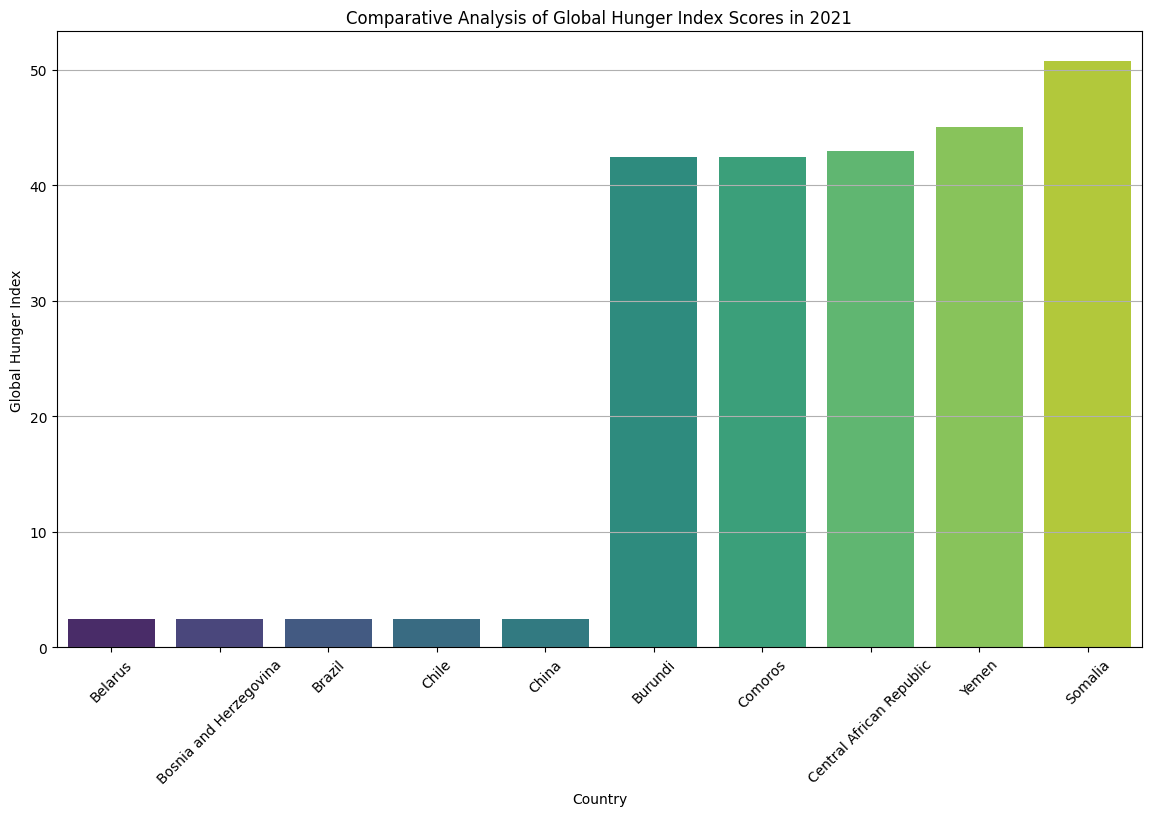

In [ ]:
# Merging the top and bottom countries for comparative visualization
comparative_df = pd.concat([top_countries, bottom_countries])

# Sorting values for better visualization
comparative_df = comparative_df.sort_values(by='global_hunger_index')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='country', y='global_hunger_index', data=comparative_df, palette='viridis')
plt.title('Comparative Analysis of Global Hunger Index Scores in 2021')
plt.xlabel('Country')
plt.ylabel('Global Hunger Index')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


The bar graph provides a comparative visualization of the Global Hunger Index scores in 2021 for countries with the highest and lowest levels of hunger. This visual comparison starkly highlights the disparity in hunger levels across different parts of the world, with Somalia, Yemen, Central African Republic, Burundi, and Comoros facing severe challenges, whereas countries like Belarus, Bosnia and Herzegovina, Brazil, Chile, and China exhibit significantly lower hunger index scores.

Such insights are invaluable for organizations and governments focusing on food security, as they point to where interventions are most needed to combat hunger effectively.